### Performing decision tree

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df = df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who'])

In [8]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

C:\Users\bisss\AppData\Local\Temp\ipykernel_4576\3727767796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\bisss\AppData\Local\Temp\ipykernel_4576\3727767796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [9]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [10]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Text(0.5, 1.0, 'Decision Tree on Titanic Dataset')

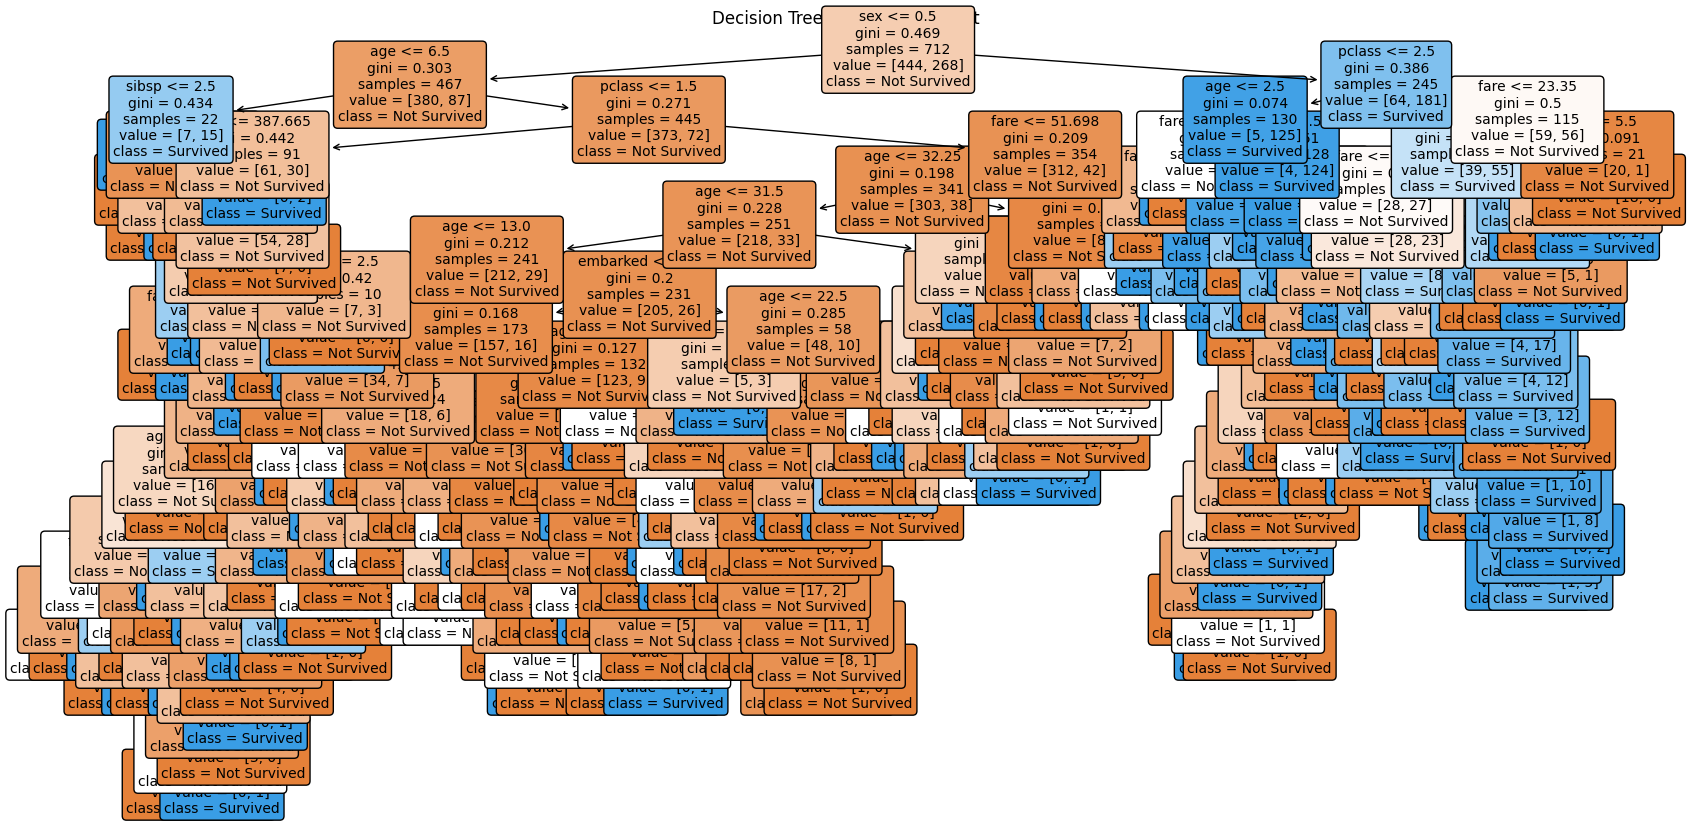

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['Not Survived', 'Survived'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree on Titanic Dataset")

In [22]:
# Training accuracy
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Testing accuracy
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.98
Test Accuracy: 0.80


In [23]:
model_small = DecisionTreeClassifier(max_depth=3, random_state=42)
model_small.fit(X_train, y_train)

train_acc_small = model_small.score(X_train, y_train)
test_acc_small = model_small.score(X_test, y_test)

print(f"Shallow Tree (max_depth=3):")
print(f"Train Accuracy: {train_acc_small:.2f}")
print(f"Test Accuracy: {test_acc_small:.2f}")

Shallow Tree (max_depth=3):
Train Accuracy: 0.83
Test Accuracy: 0.80


In [24]:
model_split = DecisionTreeClassifier(min_samples_split=10, random_state=42)
model_split.fit(X_train, y_train)

train_acc_split = model_split.score(X_train, y_train)
test_acc_split = model_split.score(X_test, y_test)

print(f"Tree with min_samples_split=10:")
print(f"Train Accuracy: {train_acc_split:.2f}")
print(f"Test Accuracy: {test_acc_split:.2f}")

Tree with min_samples_split=10:
Train Accuracy: 0.91
Test Accuracy: 0.85


In [26]:
clf_no_prune = DecisionTreeClassifier(random_state=42)
clf_no_prune.fit(X_train, y_train)
y_pred_no_prune = clf_no_prune.predict(X_test)
acc_no_prune = accuracy_score(y_test, y_pred_no_prune)


In [27]:
clf_prune = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_prune.fit(X_train, y_train)
y_pred_prune = clf_prune.predict(X_test)
acc_prune = accuracy_score(y_test, y_pred_prune)

In [28]:
print(f"Accuracy without pruning: {acc_no_prune:.4f}")
print(classification_report(y_test, y_pred_no_prune))

Accuracy without pruning: 0.7989
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [29]:
print(f"Accuracy with pruning (max_depth=3): {acc_prune:.4f}")
print(classification_report(y_test, y_pred_prune))



Accuracy with pruning (max_depth=3): 0.7989
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



Text(0.5, 1.0, 'Decision Tree with pruning (max_depth=3)')

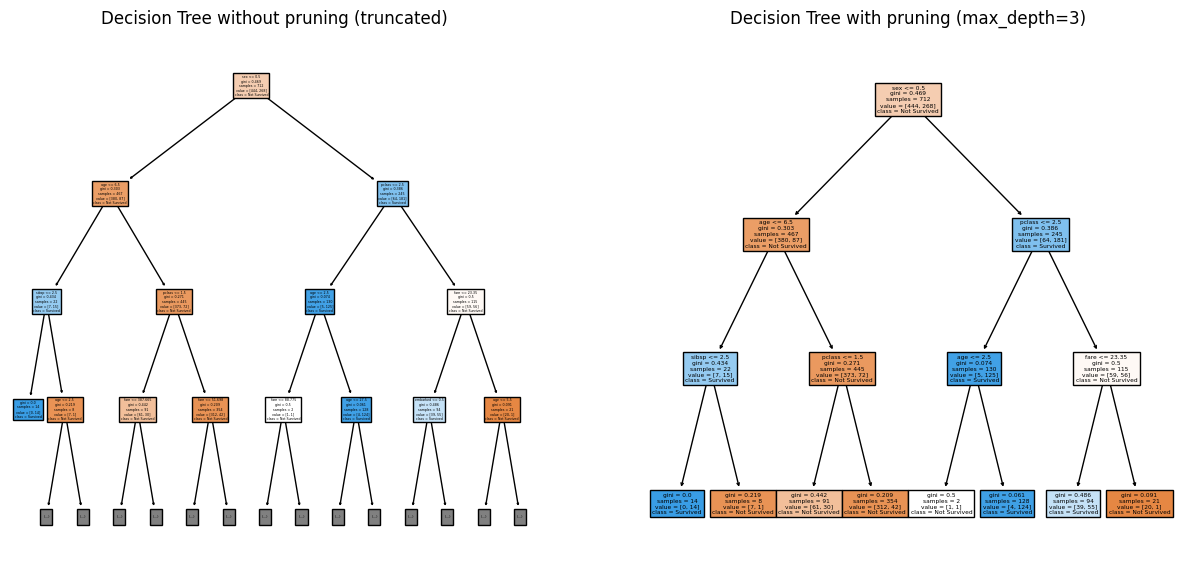

In [30]:
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plot_tree(clf_no_prune, filled=True, feature_names=X.columns, class_names=['Not Survived','Survived'], max_depth=3)
plt.title('Decision Tree without pruning (truncated)')

plt.subplot(1, 2, 2)
plot_tree(clf_prune, filled=True, feature_names=X.columns, class_names=['Not Survived','Survived'])
plt.title('Decision Tree with pruning (max_depth=3)')